<a id="top"></a>

# Exploring JWST Transmission Spectrum Proposals

***

# Learning Goals

By the end of this tutorial, you will:

- Understand how MAST makes its transiting exoplanet time-series data accessible.
- Be able to download MAST-hosted data for specific exoplanets.
- Become familiar with the exo.MAST, astoquery, and MAST APIs.
- Sort MAST data product metadata by attributes (e.g., year, PI).

# Introduction



# Imports

- *jdaviz* to visualize JWST data.

In [52]:
import jdaviz
import matplotlib.pyplot as plt

# Main Contents

## Acquiring data

In [2]:
import requests
import sys
# retrieve our system's Python version for the request. 
version = ".".join(map(str, sys.version_info[:3]))
# create HTTP Header Variables
headers = {"Content-type": "application/x-www-form-urlencoded",
           "Accept": "text/plain",
           "User-agent":"python-requests/"+version}

In [3]:
# use the spectralDB API
import matplotlib.pyplot as plt

# base API url
request_url='https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename=jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()
wav = resolved_object['data']['wavelength']

flux = resolved_object['data']['flux']
flux_err = resolved_object['data']['fluxErr']
plt.plot(wav, flux)
plt.yscale('log')


KeyError: 'data'

In [4]:
resolved_object

{'detail': 'Bad Request: Filename jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits is currently not supported in the JWST Spectra database.'}

In [352]:
resolved_object # is it that the x1dints.fits files aren't on spectralDB yet?
# why can't i plot up the WASP-39 spectra?

{'detail': 'Bad Request: Filename jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits is currently not supported in the JWST Spectra database.'}

In [244]:
resolved_object

{'detail': 'Bad Request: Filename jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048.fits is currently not supported in the JWST Spectra database.'}

In [245]:
# use the spectralDB API

# base API url
request_url='https://mast.stsci.edu/spectra/api/v0.1/retrieve?mission=jwst'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()
wav = resolved_object['data']['wavelength']

flux = resolved_object['data']['flux']
flux_err = resolved_object['data']['fluxErr']




KeyError: 'data'

In [179]:
resolved_object

{'status': -1,
 'message': 'No pixel data found data for file jw01177007001_xx101_00001_miri_x1d.fits',
 'uri': None,
 'filename': 'jw01177007001_xx101_00001_miri_x1d.fits',
 'column_metadata': {'wavelength': {'dtype': 'float',
   'description': 'wavelength values',
   'units': 'um',
   'fitsExt': 'WAVELENGTH'},
  'flux': {'dtype': 'float',
   'description': 'flux values',
   'units': 'Jy',
   'fitsExt': 'FLUX'},
  'fluxErr': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy',
   'fitsExt': 'FLUX_ERROR'},
  'fluxVarPoisson': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_POISSON'},
  'fluxVarRnoise': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_RNOISE'},
  'fluxVarFlat': {'dtype': 'float',
   'description': 'error values',
   'units': 'Jy^2',
   'fitsExt': 'FLUX_VAR_FLAT'},
  'sb': {'dtype': 'float',
   'description': 'surface brightness.  set to zero for point sourc

In [173]:
# use the spectralDB API

# base API url
request_url='https://mast.stsci.edu/spectra/api/v0.1/retrieve/derived?uri=mast:JWST/product/jw01125-o006_t001_nirspec_g140h-f100lp_x1d.fits'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()
resolved_object

{'status': -1,
 'message': 'No derived data found data for file jw01177009001_xx101_00001_miri_x1d.fits',
 'uri': 'mast:JWST/product/jw01177009001_xx101_00001_miri_x1d.fits',
 'filename': 'jw01177009001_xx101_00001_miri_x1d.fits',
 'data': []}

In [56]:
resolved_object['column_metadata']

KeyError: 'column_metadata'

In [ ]:
# get the FITS file with astroquery

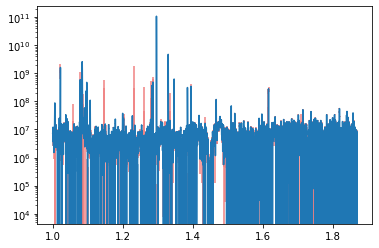

In [34]:
import matplotlib.pyplot as plt
plt.errorbar(wav, flux, yerr=flux_err, ecolor='lightcoral')
plt.yscale('log')

In [5]:
# use the spectralDB API

# base API url
import requests
request_url='https://mast.stsci.edu/spectra/api/v0.1/search/columns/'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()



In [6]:
for l in resolved_object['parameters']:
    print(l['parameter'])

observationID
qualityFlag
fileName
caomDataRelease
productType
objectType
redshift
exomastID
targetName
targetRA
targetDec
primaryHeader
instrument
detector
filter
band
expCount
expType
proposerName
proposerRA
proposerDec
template
fileType
calVer
calVcs
spdVer
prdVer
obsID
visitID
program
obsNum
visitNum
visitGrp
scienceHeader
numSpectra
mission
snrContinuum
outliers
similarityClassifier
spectralType
derSnr
spaxelIdx
productType
flux
err
fluxErr
fluxVarPoisson
fluxVarRnoise
fluxVarFlat
quality
wavelength
snr
dispersion
x
y
sb
sbErr
sbVarPoisson
sbVarRnoise
sbVarFlat
bkg
bkgErr
bkgVarPoisson
bkgVarRnoise
bkgVarFlat
npixels
sci
wmap
wht
con
varPoisson
varRnoise
varFlat
weight
ninput
spaxelIdx


In [184]:
# submit the request
url = 'https://mast.stsci.edu/spectra/api/v0.1/search'
conditions = {'program': 2512}
r = requests.post(url, json={'conditions': conditions, 'columns': ['err', 'quality', 'targetName']})

# get the response
data = r.json()
data

{'detail': 'Bad Request: Cannot execute query.  Check input syntax and parameter names.'}

# Start here

In [4]:
import requests
import sys
# retrieve our system's Python version for the request. 
version = ".".join(map(str, sys.version_info[:3]))
# create HTTP Header Variables
headers = {"Content-type": "application/x-www-form-urlencoded",
           "Accept": "text/plain",
           "User-agent":"python-requests/"+version}

In [8]:
# submit the request. why doesn't WASP-39 work?
url = 'https://mast.stsci.edu/spectra/api/v0.1/search'
conditions = {'flux.gt': '0','targetName': 'WASP49'}
r = requests.post(url, json={'conditions': conditions,
                             'columns': ['err', 'quality', 'targetName']})

# get the response
data = r.json()
data

{'detail': 'Bad Request: Cannot execute query.  Check input syntax and parameter names.'}

In [309]:
# submit the request. why doesn't WASP-39 work?
url = 'https://mast.stsci.edu/spectra/api/v0.1/search'
conditions = {'flux.gt': '0','wavelength':'14,14.5'}
r = requests.post(url, json={'conditions': conditions,
                             'columns': ['err', 'quality', 'targetName']})

# get the response
data = r.json()
data

{'status': 1,
 'query': "select d.fileName, s.x, s.y, s.wavelength, s.flux, s.err, s.quality, d.targetName from dbo.DataProduct as d join dbo.SpectralPixel as s on d.DataProductID=s.DataProductID where d.productType = 'x1d' and s.flux > 0 and s.wavelength between 14 and 14.5 ;",
 'results': [{'fileName': 'jw01349-c1004_t002_miri_ch3-longmediumshort-_x1d.fits',
   'x': 817,
   'y': None,
   'wavelength': 14.002500212052837,
   'flux': 1.26101349756258,
   'err': None,
   'quality': 0,
   'targetName': 'WR140 OFFSET 1'},
  {'fileName': 'jw01349-c1004_t002_miri_ch3-longmediumshort-_x1d.fits',
   'x': 818,
   'y': None,
   'wavelength': 14.005500212078914,
   'flux': 1.2620208623055118,
   'err': None,
   'quality': 0,
   'targetName': 'WR140 OFFSET 1'},
  {'fileName': 'jw01349-c1004_t002_miri_ch3-longmediumshort-_x1d.fits',
   'x': 819,
   'y': None,
   'wavelength': 14.008500212104991,
   'flux': 1.267619079485755,
   'err': None,
   'quality': 0,
   'targetName': 'WR140 OFFSET 1'},
  {'

In [362]:
#2MASS J12560183-1257276: BD


['',
 '10 Hygiea2MASS J12560183-12572762MASS J16194609+55341782MASS J17430448+66550152MASS J17540383-2810466ABELL2744BD+04 3653GCRV 21765GSPC P330-EHWK-I 74230IRAS 05248-7007JUPITERJWST-NEP-TDFKopffNGC 2070 S7BNGC 7469SDSSJ1652+1728SDSSJ1723+3411TYC 3986-834-1TYC 4433-1800-1VV114WD1657+343']

In [386]:
#0 to 2:
one = ['', '10 Hygiea', '2MASS J12560183-1257276', '2MASS J16194609+5534178',
 '2MASS J17430448+6655015', '2MASS J17540383-2810466', 'ABELL2744',
 'BD+04 3653', 'GCRV 21765', 'GSPC P330-E', 'HWK-I 74230', 'IRAS 05248-7007',
 'JUPITER', 'JWST-NEP-TDF', 'Kopff', 'NGC 2070 S7B', 'NGC 7469',
 'SDSSJ1652+1728', 'SDSSJ1723+3411', 'TYC 3986-834-1', 'TYC 4433-1800-1',
 'VV114', 'WD1657+343',]



# 2-3
two = ['', '10 Hygiea', '216 Kleopatra' '2MASS J11042275-7718080',
 '2MASS J12560183-1257276', '2MASS J16194609+5534178',
 '2MASS J17540383-2810466', 'ABELL2744' 'BD+04 3653' 'GANYMEDE',
 'GCRV 21765', 'GSC 02581-02323', 'GSPC P330-E', 'HWK-I 74230',
 'IRAS 05248-7007', 'JWST-NEP-TDF' ,'Kopff' 'NGC 2070 S7B' 'NGC 7469',
 'SDSSJ1652+1728', 'SDSSJ1723+3411' ,'TYC 3986-834-1' 'TYC 4433-1800-1',
 'VV114', 'WD1657+343', '[PCW91] CED 110 IRS 4']


#3 to 3.5
three = ['' ,'10 Hygiea' '216 Kleopatra', '2MASS J11042275-7718080',
 '2MASS J12560183-1257276' ,'2MASS J16194609+5534178',
 '2MASS J17540383-2810466' ,'ABELL2744' 'BD+04 3653', 'GANYMEDE',
 'GCRV 21765', 'GSC 02581-02323' ,'GSPC P330-E' 'HWK-I 74230',
 'IRAS 05248-7007' ,'JWST-NEP-TDF' ,'Kopff' 'NGC 2070 S7B' 'NGC 7469',
 'SDSSJ1652+1728', 'SDSSJ1723+3411', 'TYC 3986-834-1', 'TYC 4433-1800-1',
 'VV114' ,'[PCW91] CED 110 IRS 4']


#3.5 to 3.7
four = ['' '10 Hygiea' ,'216 Kleopatra' ,'2MASS J11042275-7718080'
 '2MASS J12560183-1257276', '2MASS J16194609+5534178' ,'ABELL2744',
 'GANYMEDE' 'GCRV 21765', 'GSC 02581-02323', 'GSPC P330-E', 'HWK-I 74230',
 'IRAS 05248-7007' ,'JWST-NEP-TDF', 'Kopff', 'NGC 2070 S7B', 'NGC 7469',
 'SDSSJ1723+3411' ,'TYC 4433-1800-1' ,'VV114', '[PCW91] CED 110 IRS 4']



#3.7 to 4
five = ['' '10 Hygiea', '216 Kleopatra', '2MASS J11042275-7718080',
 '2MASS J12560183-1257276' ,'2MASS J16194609+5534178', 'ABELL2744',
 'GANYMEDE' ,'GCRV 21765', 'GSC 02581-02323', 'GSPC P330-E' ,'HWK-I 74230',
 'IRAS 05248-7007' ,'Kopff', 'NGC 2070 S7B', 'NGC 7469', 'SDSSJ1723+3411',
 'TYC 4433-1800-1' ,'VV114' ,'[PCW91] CED 110 IRS 4']

#4 to 4.25,
six = ['', '10 Hygiea' '216 Kleopatra' ,'2MASS J11042275-7718080',
 '2MASS J12560183-1257276', '2MASS J16194609+5534178', 'ABELL2744',
 'GANYMEDE', 'GCRV 21765' ,'GSC 02581-02323' 'GSPC P330-E', 'HWK-I 74230',
 'IRAS 05248-7007', 'Kopff' ,'NGC 2070 S7B' 'NGC 7469' 'SDSSJ1723+3411',
 'TYC 4433-1800-1' ,'VV114' ,'[PCW91] CED 110 IRS 4']

#4.25 to 4.5
seven = ['', '10 Hygiea', '216 Kleopatra' ,'2MASS J11042275-7718080',
 '2MASS J12560183-1257276' ,'2MASS J16194609+5534178' ,'ABELL2744',
 'GANYMEDE' ,'GCRV 21765', 'GSC 02581-02323' ,'GSPC P330-E', 'HWK-I 74230',
 'IRAS 05248-7007', 'Kopff' ,'NGC 2070 S7B', 'NGC 7469' 'SDSSJ1723+3411',
 'TYC 4433-1800-1', 'VV114', '[PCW91] CED 110 IRS 4']

# 4.5 to 5
eight = ['' '* bet Dor' ,'10 Hygiea', '10LAC', '10LAC-BKG' ,'118 Peitho' ,'16 Cyg B',
 '16 Cyg B Background' ,'216 Kleopatra' ,'2MASS J05220207-6930388',
 '2MASS J11042275-7718080', '2MASS J12560183-1257276',
 '2MASS J16194609+5534178', 'ABELL2744', 'GANYMEDE' ,'GCRV 21765'
 'GSC 02581-02323' ,'GSPC P330-E' 'Gaia DR1 4657988102378365184',
 'HD 159222' ,'HD 163466' 'HD 163466 Background', 'HD 163466-BKG',
 'HD 167060' ,'HD 167060 Background', 'HD 193090' ,'HD 37122' 'HWK-I 74230',
 'ID 125674' ,'ID 151044' ,'ID 81179', 'IRAS 05248-7007' ,'JUPITER' 'Kopff',
 'NAME LMC', 'NGC 2070 S7B', 'NGC 2070 S7B BG' 'NGC 6543' 'NGC 7319 MRS',
 'NGC 7469', 'SDSSJ1723+3411', 'TYC 4433-1800-1' ,'VHS-1256B-BACKGROUND',
 'VV114', 'VV114-BK' ,'WR140 OFFSET 1', 'WR140 OFFSET 2',
 '[PCW91] CED 110 IRS 4']


#5 to6
nine = ['' '* bet Dor', '10 Hygiea', '10LAC' '10LAC-BKG', '118 Peitho' '16 Cyg B',
 '16 Cyg B Background' '216 Kleopatra', '2MASS J05220207-6930388',
 '2MASS J11042275-7718080', '2MASS J12560183-1257276',
 '2MASS J16194609+5534178', 'ABELL2744' 'Drift-monitoring-background',
 'GANYMEDE', 'GCRV 21765', 'GSPC P330-E' 'Gaia DR1 4657988102378365184',
 'HD 159222', 'HD 163466', 'HD 163466 Background', 'HD 163466-BKG',
 'HD 167060', 'HD 167060 Background' 'HD 193090', 'HD 37122' 'HWK-I 74230',
 'ID 125674', 'ID 151044', 'ID 81179' 'IRAS 05248-7007', 'JUPITER' 'Kopff',
 'NAME LMC', 'NGC 2070 S7B', 'NGC 2070 S7B BG' 'NGC 6543', 'NGC 7319 MRS',
 'NGC 7469', 'SDSSJ1723+3411', 'SPT0418-47' ,'SPT0418-47-OFFSET',
 'TYC 4433-1800-1', 'VHS-1256B-BACKGROUND' ,'VV114' 'VV114-BK',
 'WR140 OFFSET 1' ,'WR140 OFFSET 2' ,'[PCW91] CED 110 IRS 4']

#6 to 7
ten = ['' '10 Hygiea', '10LAC', '10LAC-BKG', '16 Cyg B', '16 Cyg B Background',
 '2MASS J05220207-6930388', '2MASS J12560183-1257276',
 'Drift-monitoring-background' ,'GANYMEDE' 'Gaia DR1 4657988102378365184',
 'HD 158485', 'HD 159222', 'HD 163466' 'HD 163466-BKG', 'HD 167060',
 'HD 167060 Background', 'HD 193090' 'HD 37122', 'IRAS 05248-7007' 'JUPITER',
 'NAME LMC', 'NGC 2070 S7B', 'NGC 2070 S7B BG', 'NGC 6543' 'NGC 7319 MRS',
 'NGC 7469', 'SPT0418-47', 'SPT0418-47-OFFSET' ,'VHS-1256B-BACKGROUND',
 'VV114', 'VV114-BK', 'WR140 OFFSET 1', 'WR140 OFFSET 2']


#7 to 9,
eleven = ['' '* bet Dor', '10 Hygiea', '10LAC', '10LAC-BKG', '118 Peitho', '16 Cyg B',
 '16 Cyg B Background', '2MASS J05220207-6930388' '2MASS J12560183-1257276',
 'Drift-monitoring-background', 'GANYMEDE' 'Gaia DR1 4657988102378365184',
 'HD 158485', 'HD 159222', 'HD 163466', 'HD 163466 Background',
 'HD 163466-BKG', 'HD 167060', 'HD 167060 Background', 'HD 193090' 'HD 37122',
 'ID 125674', 'ID 151044' 'ID 81179', 'IRAS 05248-7007', 'JUPITER',
 'MIRI-BACKGR-COLD', 'NAME LMC', 'NGC 2070 S7B' ,'NGC 2070 S7B BG' 'NGC 6543',
 'NGC 6552', 'NGC 7319 MRS', 'NGC 7469' 'SPT0418-47' 'SPT0418-47-OFFSET',
 'TYC 4213-1049-1', 'VHS-1256B-BACKGROUND' 'VV114' 'VV114-BK',
 'WR140 OFFSET 1', 'WR140 OFFSET 2']

#9 to 13
twelve = ['' '* bet Dor', '10 Hygiea', '10LAC', '10LAC-BKG' ,'118 Peitho', '16 Cyg B',
 '16 Cyg B Background' ,'2MASS J05220207-6930388', '2MASS J12560183-1257276',
 'Drift-monitoring-background', 'GANYMEDE', 'Gaia DR1 4657988102378365184',
 'HD 158485', 'HD 159222', 'HD 163466', 'HD 163466 Background',
 'HD 163466-BKG', 'HD 167060' 'HD 167060 Background', 'HD 193090' 'HD 37122',
 'ID 125674', 'ID 151044', 'ID 81179', 'IRAS 05248-7007' ,'JUPITER',
 'MIRI Background', 'MIRI-BACKGR-COLD', 'NAME LMC', 'NGC 2070 S7B',
 'NGC 2070 S7B BG', 'NGC 6543' 'NGC 6552', 'NGC 7319 MRS', 'NGC 7469',
 'SPT0418-47', 'SPT0418-47-OFFSET', 'VHS-1256B-BACKGROUND', 'VV114',
 'VV114-BK', 'WR140 OFFSET 1', 'WR140 OFFSET 2']


#13 to 19
thirteen = ['', '* bet Dor', '10 Hygiea', '10LAC' ,'10LAC-BKG' '118 Peitho' '16 Cyg B',
 '16 Cyg B Background' ,'2MASS J05220207-6930388', '2MASS J12560183-1257276',
 'Drift-monitoring-background', 'GANYMEDE', 'Gaia DR1 4657988102378365184',
 'HD 158485', 'HD 159222', 'HD 163466' ,'HD 163466 Background',
 'HD 163466-BKG', 'HD 167060' 'HD 167060 Background' ,'HD 193090' 'HD 37122',
 'ID 125674', 'ID 151044' 'ID 81179', 'IRAS 05248-7007', 'JUPITER',
 'MIRI Background', 'MIRI-BACKGR-COLD' ,'NAME LMC', 'NGC 2070 S7B',
 'NGC 2070 S7B BG', 'NGC 6543' ,'NGC 6552', 'NGC 7319 BG', 'NGC 7469',
 'SPT0418-47', 'SPT0418-47-OFFSET', 'TYC 4213-1049-1', 'VHS-1256B-BACKGROUND',
 'VV114', 'VV114-BK' 'WR140 OFFSET 1', 'WR140 OFFSET 2']


#19 to 30

fourteen = ['' '* bet Dor', '10 Hygiea', '10LAC', '10LAC-BKG', '118 Peitho' ,'16 Cyg B',
 '16 Cyg B Background', '2MASS J05220207-6930388', '2MASS J12560183-1257276',
 'Drift-monitoring-background', 'GANYMEDE', 'Gaia DR1 4657988102378365184',
 'HD 158485', 'HD 159222' ,'HD 163466', 'HD 163466 Background',
 'HD 163466-BKG', 'HD 167060', 'HD 167060 Background' 'HD 193090' 'HD 37122',
 'ID 125674', 'ID 151044', 'ID 81179', 'IRAS 05248-7007' 'JUPITER',
 'MIRI Background', 'MIRI-BACKGR-COLD', 'NAME LMC' 'NGC 2070 S7B',
 'NGC 2070 S7B BG', 'NGC 6543' 'NGC 6552', 'NGC 7319 BG', 'NGC 7469',
 'SPT0418-47', 'SPT0418-47-OFFSET', 'TYC 4213-1049-1', 'VHS-1256B-BACKGROUND',
 'VV114', 'VV114-BK', 'WR140 OFFSET 1', 'WR140 OFFSET 2']


full_list = np.concatenate([one, two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen])

16 Cyg B: G3b
2MASS J11042275-7718080: K6 T tauri

2MASS J17430448+6655015: A5V

2MASS J17540383-2810466: Red giant branch

BD+04 3653: K5III

GCRV 21765: A0D

GSC 02581-02323: G2V

GSPC P330-E: G2V

In [388]:
full_list = np.unique(full_list)

In [390]:
full_list[1:]

array(['* bet Dor', '10 Hygiea', '10 Hygiea216 Kleopatra', '10LAC',
       '10LAC-BKG', '10LAC-BKG118 Peitho16 Cyg B', '10LAC10LAC-BKG',
       '118 Peitho', '118 Peitho16 Cyg B', '16 Cyg B',
       '16 Cyg B Background', '16 Cyg B Background216 Kleopatra',
       '216 Kleopatra', '216 Kleopatra2MASS J11042275-7718080',
       '2MASS J05220207-6930388',
       '2MASS J05220207-69303882MASS J12560183-1257276',
       '2MASS J11042275-7718080',
       '2MASS J11042275-77180802MASS J12560183-1257276',
       '2MASS J12560183-1257276', '2MASS J16194609+5534178',
       '2MASS J17430448+6655015', '2MASS J17540383-2810466', 'ABELL2744',
       'ABELL2744BD+04 3653', 'ABELL2744BD+04 3653GANYMEDE',
       'ABELL2744Drift-monitoring-background', 'BD+04 3653',
       'Drift-monitoring-background', 'GANYMEDE', 'GANYMEDEGCRV 21765',
       'GANYMEDEGaia DR1 4657988102378365184', 'GCRV 21765',
       'GCRV 21765GSC 02581-02323', 'GSC 02581-02323',
       'GSC 02581-02323GSPC P330-E', 'GSPC P330-E',

In [35]:
import numpy as np

In [480]:
# submit the request
url = 'https://mast.stsci.edu/spectra/api/v0.1/search'
conditions = {'flux.gt': '1'}
r = requests.post(url, json={'conditions': conditions,
                             'columns': ['err', 'quality', 'targetName']})

# get the response
data = r.json()
data

{'status': 1,
 'query': "select d.fileName, s.x, s.y, s.wavelength, s.flux, s.err, s.quality, d.targetName from dbo.DataProduct as d join dbo.SpectralPixel as s on d.DataProductID=s.DataProductID where d.productType = 'x1d' and s.flux > 1 ;",
 'results': [{'fileName': 'jw01349-o002_t004_miri_ch1-mediumshortlong-_x1d.fits',
   'x': 0,
   'y': None,
   'wavelength': 4.90050009539118,
   'flux': 3.7009124678405714,
   'err': None,
   'quality': 0,
   'targetName': 'HD 193090'},
  {'fileName': 'jw01349-o002_t004_miri_ch1-mediumshortlong-_x1d.fits',
   'x': 1,
   'y': None,
   'wavelength': 4.901500095438678,
   'flux': 3.9676522149539446,
   'err': None,
   'quality': 0,
   'targetName': 'HD 193090'},
  {'fileName': 'jw01349-o002_t004_miri_ch1-mediumshortlong-_x1d.fits',
   'x': 2,
   'y': None,
   'wavelength': 4.902500095486175,
   'flux': 3.3715420286810143,
   'err': None,
   'quality': 0,
   'targetName': 'HD 193090'},
  {'fileName': 'jw01349-o002_t004_miri_ch1-mediumshortlong-_x1d.fi

In [481]:
names = []
for d in data['results']:
    names += [d['targetName']]
    
print(np.unique(names))

['' '* bet Dor' '10 Hygiea' '10LAC-BKG' '118 Peitho' '16 Cyg B'
 '16 Cyg B Background' '216 Kleopatra' '2MASS J11042275-7718080'
 '2MASS J12560183-1257276' '2MASS J16194609+5534178'
 '2MASS J17430448+6655015' '2MASS J17540383-2810466' 'BD+04 3653'
 'Drift-monitoring-background' 'GANYMEDE' 'GCRV 21765' 'GSC 02581-02323'
 'GSPC P330-E' 'Gaia DR1 4657988102378365184' 'HD 159222'
 'HD 167060 Background' 'HD 193090' 'HD 37122' 'HWK-I 74230'
 'IRAS 05248-7007' 'JUPITER' 'Kopff' 'MIRI-BACKGR-COLD' 'NGC 2070 S7B'
 'NGC 2070 S7B BG' 'NGC 6543' 'NGC 6552' 'NGC 7469' 'SDSSJ1652+1728'
 'SDSSJ1723+3411' 'SPT0418-47-OFFSET' 'TYC 3986-834-1' 'TYC 4433-1800-1'
 'VHS-1256B-BACKGROUND' 'VV114' 'VV114-BK' 'WR140 OFFSET 1'
 'WR140 OFFSET 2' '[PCW91] CED 110 IRS 4']


In [482]:
# brown dwarf: 2MASS J12560183-1257276

In [483]:
import numpy as np

In [484]:
targetname = 'JUPITER'

targetfiles = []

for d in data['results']:
    if d['targetName'] == targetname:
        targetfiles += [d['fileName']]


In [485]:
np.unique(targetfiles)

array(['jw01022-o012_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o013_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o014_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o015_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o016_t001_nirspec_g140h-f100lp_x1d.fits',
       'jw01022-o022_t001_miri_ch3-short_x1d.fits',
       'jw01022-o022_t001_miri_ch4-short_x1d.fits',
       'jw01022-o023_t001_miri_ch1-short_x1d.fits',
       'jw01022-o023_t001_miri_ch2-short_x1d.fits',
       'jw01022-o023_t001_miri_ch3-short_x1d.fits',
       'jw01022-o023_t001_miri_ch4-short_x1d.fits',
       'jw01022-o024_t001_miri_ch3-short_x1d.fits',
       'jw01022-o024_t001_miri_ch4-short_x1d.fits',
       'jw01022-o026_t001_miri_ch4-short_x1d.fits',
       'jw01246-o004_t002_miri_ch3-longshortmedium-_x1d.fits',
       'jw01246-o004_t002_miri_ch4-longshortmedium-_x1d.fits'],
      dtype='<U52')

In [468]:
# targetfile = 'jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048_s2d.fits'

Successfully found data for jw01386-o013_t004_nirspec_g140h-f100lp_x1d.fits


Text(0, 0.5, 'Flux (Jy)')

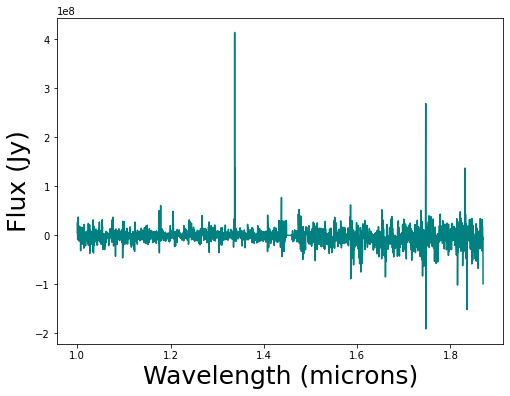

In [474]:
targetfile = np.unique(targetfiles)[0]

request_url=f'https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename={targetfile}'    

# perform the HTTP request
resp = requests.get(request_url, headers=headers)

resolved_object = resp.json()

print(resolved_object['message'])


wav = resolved_object['data']['wavelength']

flux = resolved_object['data']['flux']
flux_err = resolved_object['data']['fluxErr']
plt.figure(figsize=(8,6))
plt.errorbar(wav, flux, yerr=flux_err, color='teal')
# plt.scatter(wav, flux)

# plt.yscale('log')

plt.xlabel('Wavelength (microns)', fontsize=25)

plt.ylabel('Flux (Jy)', fontsize=25)

In [475]:
old_flux = resolved_object['data']['flux']
old_wav = resolved_object['data']['wavelength']
old_err = resolved_object['data']['fluxErr']

In [270]:
old_flux

[0.1588879014545158,
 0.16360536948249607,
 0.1568463304948879,
 0.1541451834605652,
 0.15988025714977272,
 0.16184015435832025,
 0.15711923594254135,
 0.1563151444960406,
 0.1583126417369534,
 0.15949241449342386,
 0.16038980448728749,
 0.15823903203973105,
 0.15681562562284204,
 0.15785888060613001,
 0.1587251229914334,
 0.15810334533316386,
 0.1607795248101777,
 0.16089829566929334,
 0.16247839428688296,
 0.16188481418710765,
 0.16342601019261946,
 0.16223293673478942,
 0.1625755358864809,
 0.16313782197957644,
 0.15983941305194174,
 0.15971496605029462,
 0.16046385085267992,
 0.16203095579967253,
 0.15904668054646176,
 0.16032481523283781,
 0.1589571579041433,
 0.16041533802616284,
 0.16617817624120942,
 0.16482570440316927,
 0.1670068901402013,
 0.16600391361366407,
 0.16563003725787911,
 0.16497378370122096,
 0.16565221347772438,
 0.16552017646562378,
 0.16568464571907485,
 0.16462710303607647,
 0.16887219915740637,
 0.17063156521320527,
 0.16931766103660495,
 0.167804531853837,


Successfully found data for jw01022-o012_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o013_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o014_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o015_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o016_t001_nirspec_g140h-f100lp_x1d.fits
Successfully found data for jw01022-o022_t001_miri_ch3-short_x1d.fits
Successfully found data for jw01022-o022_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o023_t001_miri_ch1-short_x1d.fits
Successfully found data for jw01022-o023_t001_miri_ch2-short_x1d.fits
Successfully found data for jw01022-o023_t001_miri_ch3-short_x1d.fits
Successfully found data for jw01022-o023_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o024_t001_miri_ch3-short_x1d.fits
Successfully found data for jw01022-o024_t001_miri_ch4-short_x1d.fits
Successfully found data for jw01022-o026_t001_miri_ch4-short

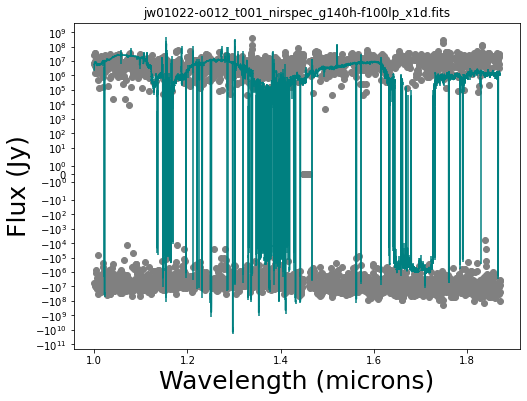

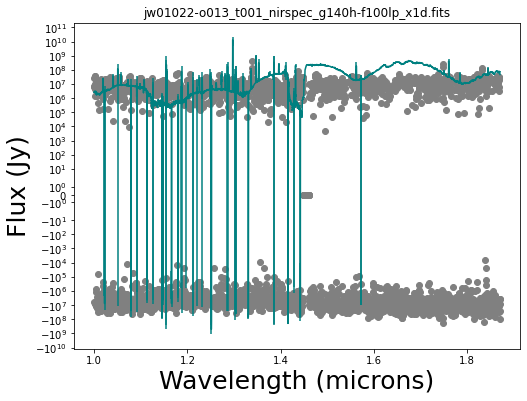

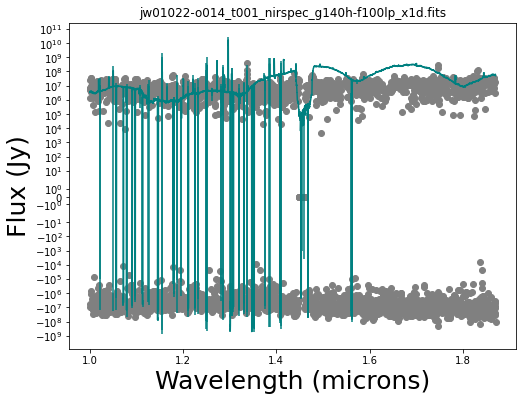

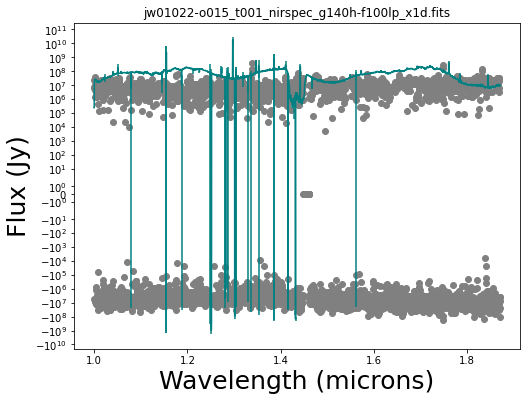

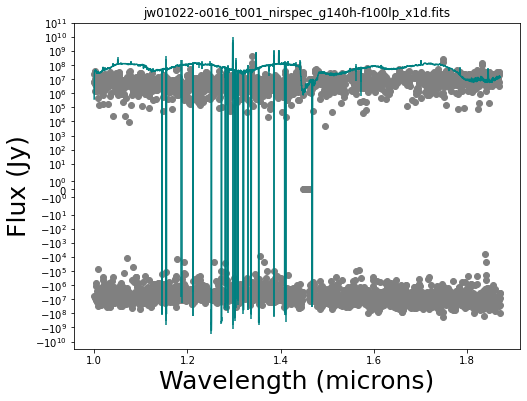

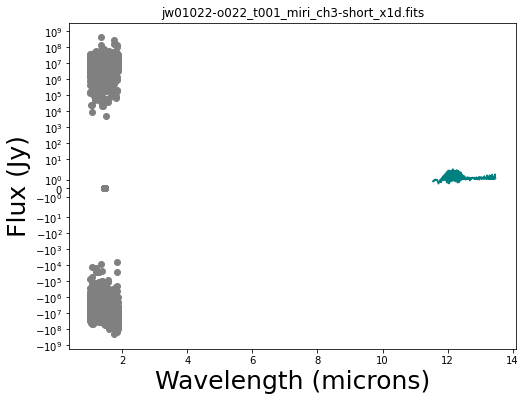

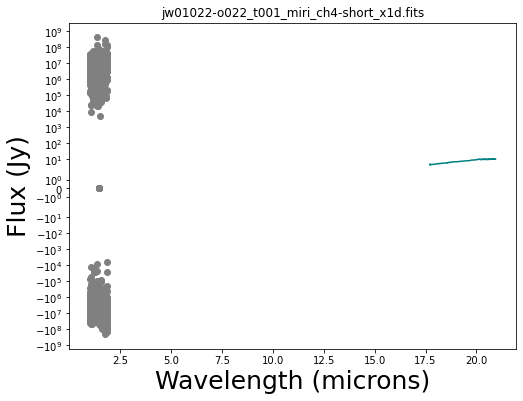

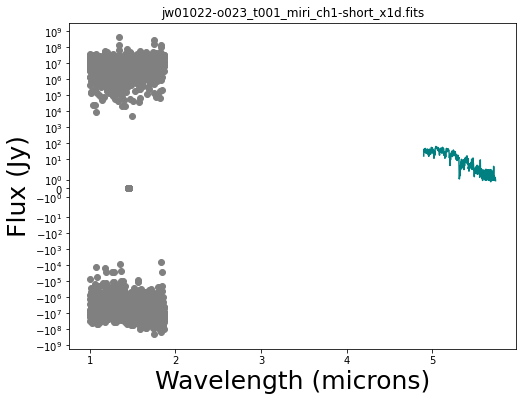

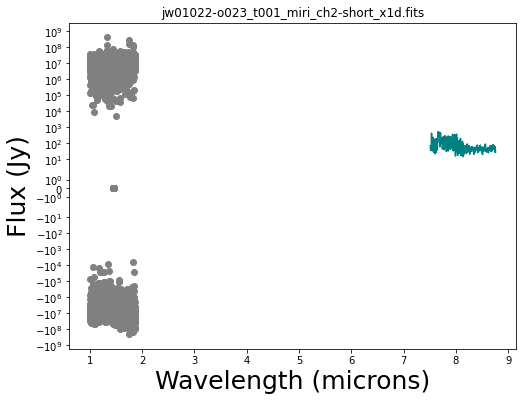

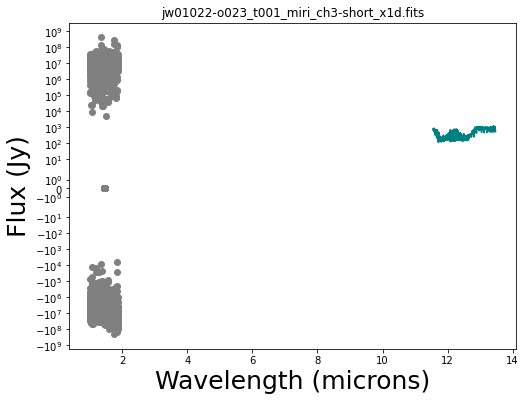

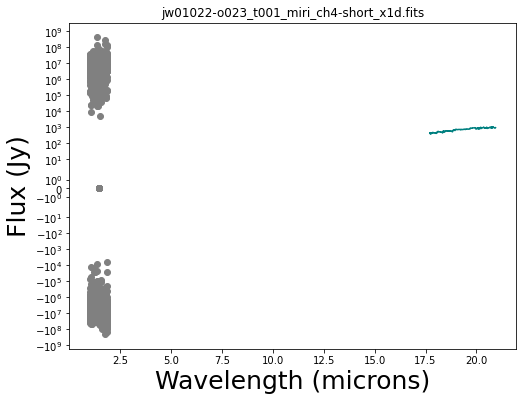

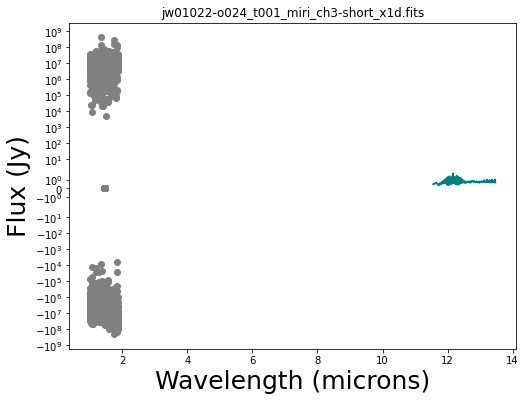

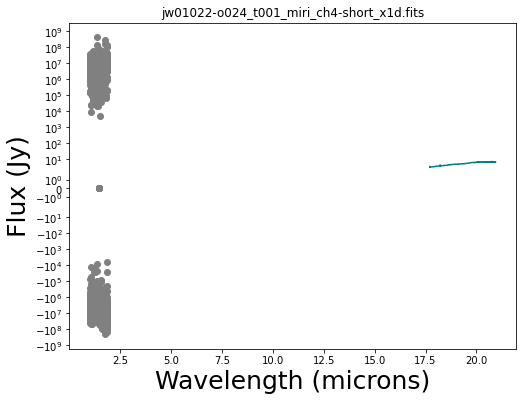

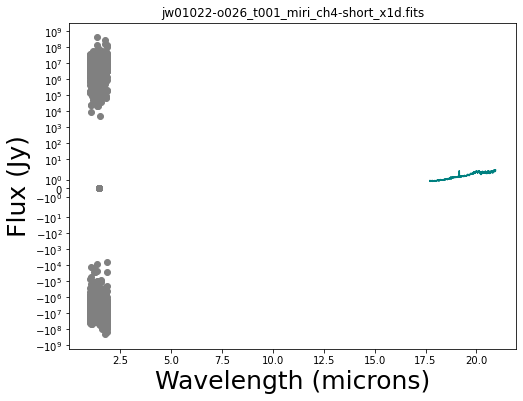

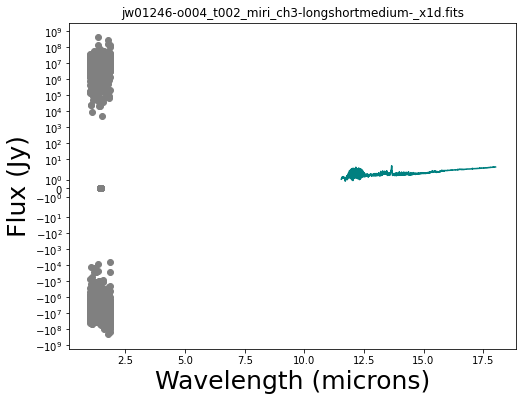

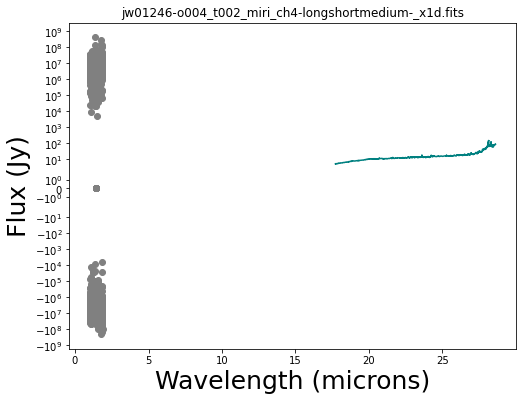

In [492]:
for targetfile in np.unique(targetfiles):

    request_url=f'https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename={targetfile}'    

    # perform the HTTP request
    resp = requests.get(request_url, headers=headers)

    resolved_object = resp.json()

    print(resolved_object['message'])


    wav = resolved_object['data']['wavelength']

    flux = resolved_object['data']['flux']
    flux_err = resolved_object['data']['fluxErr']
    plt.figure(figsize=(8,6))

    plt.scatter(old_wav, np.array(old_flux), color='gray', label='Brown Dwarf')
    plt.errorbar(wav, flux, yerr=flux_err, color='teal', label='Jupiter')
    plt.title(targetfile)

    plt.yscale('symlog')

    plt.xlabel('Wavelength (microns)', fontsize=25)

    plt.ylabel('Flux (Jy)', fontsize=25)


In [ ]:
jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048

In [16]:
print(resolved_object['column_metadata']['wavelength']['units'])

um


In [19]:
print(resolved_object['column_metadata']['flux']['units'])

Jy


# End here

In [403]:
from astroquery.mast import Observations

In [408]:
obs_table = Observations.query_object('WASP-39')


In [409]:
obs_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str12,str12,str9,str17,str16,str23,str32,str54,float64,float64,str10,str19,int64,float64,float64,float64,float64,float64,str79,float64,str27,str9,int64,str13413,str183,str184,str6,bool,float64,str8,float64
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0051-1-3,220.20290665853858,-3.163509993553602,image,"Ricker, George",3,59692.44931563657,59717.03936539352,475.199783,600.0,1000.0,--,59758.0,N/A,--,51,POLYGON 212.950375 -6.927358 215.902962 4.17225 227.66324 0.797237 224.303033 -10.628089 212.950375 -6.927358,--,--,PUBLIC,False,nan,87584531,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,181949561,--,tess2022112184951-s0051-0000000181949561-0223-s,217.326729902534,-3.44450084614399,timeseries,"Ricker, George",3,59692.45768864583,59717.03930048611,120.0,600.0,1000.0,--,59758.0,G04226_G04098_G04242_G04191,--,51,CIRCLE 217.3267299 -3.44450085 0.00138889,--,mast:TESS/product/tess2022112184951-s0051-0000000181949561-0223-s_lc.fits,PUBLIC,False,nan,87494793,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,181948330,--,tess2022112184951-s0051-0000000181948330-0223-s,217.232831993426,-3.37173984633707,timeseries,"Ricker, George",3,59692.457688587965,59717.03929584491,120.0,600.0,1000.0,--,59758.0,G04191,--,51,CIRCLE 217.23283199 -3.37173985 0.00138889,--,mast:TESS/product/tess2022112184951-s0051-0000000181948330-0223-s_lc.fits,PUBLIC,False,nan,87494787,422.25065064969016
science,TESS,SPOC,Photometer,TESS,TESS,Optical,181948310,--,tess2022112184951-s0051-0000000181948310-0223-s,217.19914317916,-3.29938079448266,timeseries,"Ricker, George",3,59692.45768782408,59717.0392928588,120.0,600.0,1000.0,--,59758.0,G04039,--,51,CIRCLE 217.19914318 -3.29938079 0.00138889,--,mast:TESS/product/tess2022112184951-s0051-0000000181948310-0223-s_lc.fits,PUBLIC,False,nan,87494785,690.1079637264787
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC2,Infrared,WASP-39-cluster2,--,0000028D2600,217.32660607500006,-3.4440523991370364,image,"Knutson, Heather",2,nan,nan,nan,3990.0,5010.0,Life on the Edge: Planetary Atmospheres in Extreme Environments,56050.7083333,EXTREME_PLANETS_2_80219,--,42804736,POLYGON -142.6664460 -3.44085300 -142.6698000 -3.45103400 -142.6800780 -3.44770800 -142.6767060 -3.43753600 -142.6664460 -3.44085300,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC030300/r42804736/ch2/bcd/SPITZER_I2_42804736_0045_0000_2_bcd.fits,PUBLIC,False,nan,1719441,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC2,Infrared,WASP-39-cluster2,--,0000028D2600,217.32660607500006,-3.4440523991370364,image,"Knutson, Heather",2,nan,nan,nan,3990.0,5010.0,Life on the Edge: Planetary Atmospheres in Extreme Environments,56050.7083333,EXTREME_PLANETS_2_80219,--,42804736,POLYGON -142.6664630 -3.44084100 -142.6698180 -3.45102200 -142.6800950 -3.44769600 -142.6767230 -3.43752400 -142.6664630 -3.44084100,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC030300/r42804736/ch2/bcd/SPITZER_I2_42804736_0192_0000_2_bcd.fits,PUBLIC,False,nan,1719441,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC2,Infrared,WASP-39-cluster2,--,0000028D2600,217.32660607500006,-3.4440523991370364,image,"Knutson, Heather",2,nan,nan,nan,3990.0,5010.0,Life on the Edge: Planetary Atmospheres in Extreme Environments,56050.7083333,EXTREME_PLANETS_2_80219,--,42804736,POLYGON -142.6664630 -3.44084800 -142.6698180 -3.45102900 -142.6800950 -3.44770300 -142.6767230 -3.43753100 -142.6664630 -3.44084800,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC030300/r42804736/ch2/bcd/SPITZER_I2_42804736_0161_0000_2_bcd.fits,PUBLIC,False,nan,1719441,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IR

In [410]:
obs_table[obs_table['instrument_name']=='JWST']

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str12,str12,str9,str17,str16,str23,str32,str54,float64,float64,str10,str19,int64,float64,float64,float64,float64,float64,str79,float64,str27,str9,int64,str13413,str183,str184,str6,bool,float64,str8,float64


In [406]:
np.unique(obs_table['project'])

HAP
HLA
HST
JWST
MIS
--
PS1
TESS
hlsp_borg


In [8]:
target_name='HD 80606 b'
target_resolver='NED'
width=u.Quantity(5, u.deg)
height=u.Quantity(5, u.deg)
r=Jwst.query_target(target_name=target_name, width=width, height=height, async_job=True)
r

NameError: name 'u' is not defined

In [17]:
from jdaviz import *

In [18]:
product_list=Jwst.get_product_list(observation_id='jw01125-o006_t001_nirspec_g140h-f100lp_x1d.fits')
for row in product_list:
    print("filename: %s" % (row['filename']))

NameError: name 'Jwst' is not defined

In [26]:
# use astoquery?
from astroquery.mast import Observations

In [52]:
# Observations.query_criteria(obs_id='216453')

Observations.download_products('1125851',
                               productType=["SCIENCE", "PREVIEW"],
                               extension="fits")

Local Path,Status,Message,URL
str65,str8,object,object
./mastDownload/K2/ktwo212635813-c06_lc/ktwo212635813-c06_llc.fits,COMPLETE,None,None


In [25]:
single_obs = Observations.get_product_list("jw01125-o006_t001_nirspec_g140h-f100lp_x1d.fits")

RemoteServiceError: Error converting data type varchar to bigint.

todo: how to get BD+60 1753 (jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048)? the s_2d file? or even show that it exists? i can download this data calibration thing but I don't know why I'm not able to find it using exo.mast or other stuff. well, it's not an exoplanet, sure. but why doesn't spectralDB find it?

## Using `jdaviz`

In [ ]:
# can jdaviz actually see it?

In [411]:
import astropy.units as u


In [412]:
# Suppress warnings
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [413]:
from jdaviz import Specviz
specviz = Specviz()

In [414]:
specviz.app


Application(config='specviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'dat…

In [415]:
import astropy.io.fits as pyfits

In [430]:


new_fits = pyfits.getdata('/Users/arjunsavel/Downloads/MAST_2022-09-21T2330/JWST/jw01366-o001_t001_niriss_clear-gr700xd-substrip256/jw01366-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits'
           
           
           
           )



In [431]:
new_fits

FITS_rec([(2.8332355 , 0., 5.93533959e-08, 0., 0., 0., 0., 0., 0., 0., 0.,           0, 0., 0., 0., 0., 0., 40.),
          (2.83222449, 0., 2.32897917e-08, 0., 0., 0., 0., 0., 0., 0., 0.,           0, 0., 0., 0., 0., 0., 40.),
          (2.83121357, 0., 1.09909214e-08, 0., 0., 0., 0., 0., 0., 0., 0.,           0, 0., 0., 0., 0., 0., 40.),
          ...,
          (0.8479603 , 0., 3.72674949e-11, 0., 0., 0., 0., 0., 0., 0., 0.,           0, 0., 0., 0., 0., 0., 40.),
          (0.84707781, 0., 3.60610519e-11, 0., 0., 0., 0., 0., 0., 0., 0.,           0, 0., 0., 0., 0., 0., 40.),
          (0.84619544, 0., 1.35295552e-11, 0., 0., 0., 0., 0., 0., 0., 0.,           0, 0., 0., 0., 0., 0., 40.)],
         dtype=(numpy.record, [('WAVELENGTH', '>f8'), ('FLUX', '>f8'), ('FLUX_ERROR', '>f8'), ('FLUX_VAR_POISSON', '>f8'), ('FLUX_VAR_RNOISE', '>f8'), ('FLUX_VAR_FLAT', '>f8'), ('SURF_BRIGHT', '>f8'), ('SB_ERROR', '>f8'), ('SB_VAR_POISSON', '>f8'), ('SB_VAR_RNOISE', '>f8'), ('SB_VAR_FLAT', '>f8'), (

In [422]:
len(new_fits)

2048

In [428]:
wav = []
flux = []
for i in range(len(new_fits)):
    wav += [new_fits[i][0]]
    flux += [new_fits[i][1]]

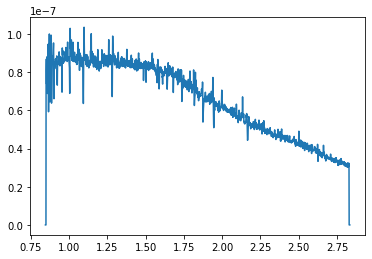

In [429]:
plt.plot(wav, flux)

In [314]:
old_fits =  pyfits.getdata('/Users/arjunsavel/.astropy/cache/download/url/b98c9bc8cf7bf9595f40df56f223d1bd/contents')

In [315]:
old_header =  pyfits.getheader('/Users/arjunsavel/.astropy/cache/download/url/b98c9bc8cf7bf9595f40df56f223d1bd/contents')




In [316]:
old_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4514496847.55 / 1st row - Number of seconds since Nov 17 1858  
RA      =            1.485465  / 1st row - Right ascension of telescope boresigh
DEC     =            14.972768 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '02:32:03.00'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                52251 / MJD of observation                             
MJDLIST = '52251   '        

In [317]:
new_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-07-20T21:03:12.624' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02589-o002_t001_niriss_f277w-gr700xd-substrip256_x1dints.fits' / Na
SDP_VER = '2022_2a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-055'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.5.3   '        

In [305]:
new_fits

FITS_rec([([ 35,  65,  83,  68,  70,  32,  49,  46,  48,  46,  48,  10,  35,  65,  83,  68,  70,  95,  83,  84,  65,  78,  68,  65,  82,  68,  32,  49,  46,  53,  46,  48,  10,  37,  89,  65,  77,  76,  32,  49,  46,  49,  10,  37,  84,  65,  71,  32,  33,  32, 116,  97, 103,  58, 115, 116, 115,  99, 105,  46, 101, 100, 117,  58,  97, 115, 100, 102,  47,  10,  45,  45,  45,  32,  33,  99, 111, 114, 101,  47,  97, 115, 100, 102,  45,  49,  46,  49,  46,  48,  10,  97, 115, 100, 102,  95, 108, 105,  98, 114,  97, 114, 121,  58,  32,  33,  99, 111, 114, 101,  47, 115, 111, 102, 116, 119,  97, 114, 101,  45,  49,  46,  48,  46,  48,  32, 123,  97, 117, 116, 104, 111, 114,  58,  32,  84, 104, 101,  32,  65,  83,  68,  70,  32,  68, 101, 118, 101, 108, 111, 112, 101, 114, 115,  44,  32, 104, 111, 109, 101, 112,  97, 103, 101,  58,  32,  39, 104, 116, 116, 112,  58,  47,  47, 103, 105, 116, 104, 117,  98,  46,  99, 111, 109,  47,  97, 115, 100, 102,  45, 102, 111, 114, 109,  97, 116,  47,  97

In [334]:
cal_file = '/Users/arjunsavel/Downloads/MAST_2022-07-31T2309/JWST/jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048/jw01539-c1016_s00004_nirspec_f100lp-g140h-s1600a1-sub2048_s2d.fits'



In [336]:
from astropy.utils.data import download_file
# fn = download_file('https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/0751/spec-0751-52251-0160.fits', cache=True)
specviz.load_spectrum(cal_file,
                      "myfile")

/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/jdaviz/app.py:1273: UserWarning: No data item with id '7ad1cb9a-6b47-4019-a1bc-132943f48a41' found in viewer 'specviz-0'.
  warnings.warn(f"No data item with id '{data_id}' found in "
/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/jdaviz/app.py:1273: UserWarning: No data item with id 'f09af519-f852-4d0f-8b85-8cc71c07b895' found in viewer 'specviz-0'.
  warnings.warn(f"No data item with id '{data_id}' found in "


In [337]:
from jdaviz import Specviz2d
specviz2d = Specviz2d()

In [341]:
specviz2d.app


Application(config='specviz2d', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'd…

In [ ]:
#jdaviz bug on m1 chip?

In [339]:
fn = download_file('https://stsci.box.com/shared/static/exnkul627fcuhy5akf2gswytud5tazmw.fits', cache=True)


In [340]:
specviz2d.load_data(fn)


/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/asdf/asdf.py:330: AsdfWarning: File 'file:///Users/arjunsavel/.astropy/cache/download/url/0020ed59db5437477364878f8b0aea32/contents' was created with extension class 'jwst.transforms.jwextension.JWSTExtension' (from package jwst==0.16.1.dev38+g0f51a321), which is not currently installed
  warnings.warn(msg, AsdfWarning)


# Exercises
- Do for a different proposal?
- Do for emission spectra?
- Do for phase curves?

# Additional Resources
- Primers on exoplanet spectral data types ([Deming, Louie, and Sheets 2018](https://iopscience.iop.org/article/10.1088/1538-3873/aae5c5/meta?casa_token=253HfRr4kyYAAAAA:C0CtfuH4Um2l4Kul5O3tajY2TolSVuXi8fGj48bzSlmJIuvPmeYkb1yXtd10MOjwPqJokDpNvv4)) 
- JWST primer

# About this Notebook

**Author**: Arjun B. Savel (asavel@umd.edu).

**Last updated**: 2022-06-12

# Citations
If you use `jdaviz` for published research, please cite the authors. Follow these links for more information about citing `jdaviz`:

* [Citing `jdaviz`](https://www.astropy.org/acknowledging.html)


[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>
